<a href="https://colab.research.google.com/github/Jiya9304/AIMLMonth2023/blob/main/code_mixed_emotion_intent_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn matplotlib seaborn nltk wordcloud

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load emotion dataset
df = pd.read_csv('Emotion_tweets_no_duplicates.csv')
df.dropna(subset=['text'], inplace=True)
df.head()

,text,emotion
0,cut doesnt with them negative ppl ll who c ur ...,angry
1,"Yes I didnt noticed it, it was hidden hidden b...",fear
2,bs rhi chiz hmare relationship ko bigad yehi thi,happy
3,Hean yar ghar akela na chor koi hy b nai .. Ba...,fear
4,Bhai pls ye mera nmbr cnfs kr m lagwata hu ter...,fear


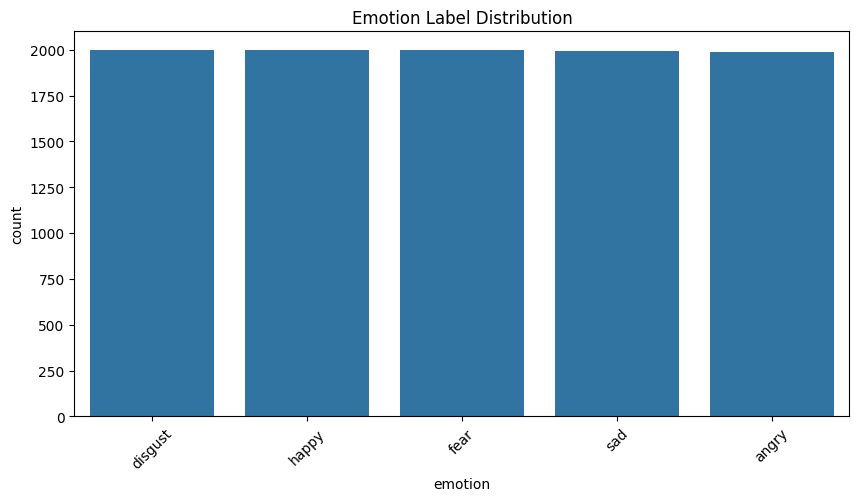

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.title('Emotion Label Distribution')
plt.xticks(rotation=45)
plt.show()


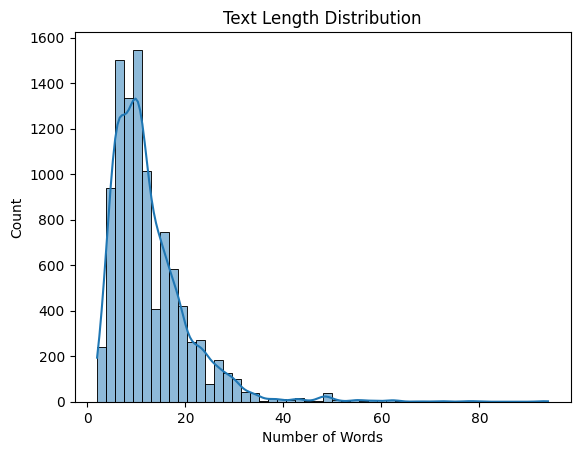

In [ ]:
# Text length distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,emotion,clean_text
0,cut doesnt with them negative ppl ll who c ur ...,angry,cut doesnt negative ppl c ur negative traits w...
1,"Yes I didnt noticed it, it was hidden hidden b...",fear,yes didnt noticed hidden hidden behind didnt n...
2,bs rhi chiz hmare relationship ko bigad yehi thi,happy,bs rhi chiz hmare relationship ko bigad yehi thi
3,Hean yar ghar akela na chor koi hy b nai .. Ba...,fear,hean yar ghar akela na chor koi hy b nai baki ...
4,Bhai pls ye mera nmbr cnfs kr m lagwata hu ter...,fear,bhai pls ye mera nmbr cnfs kr lagwata hu teri ...


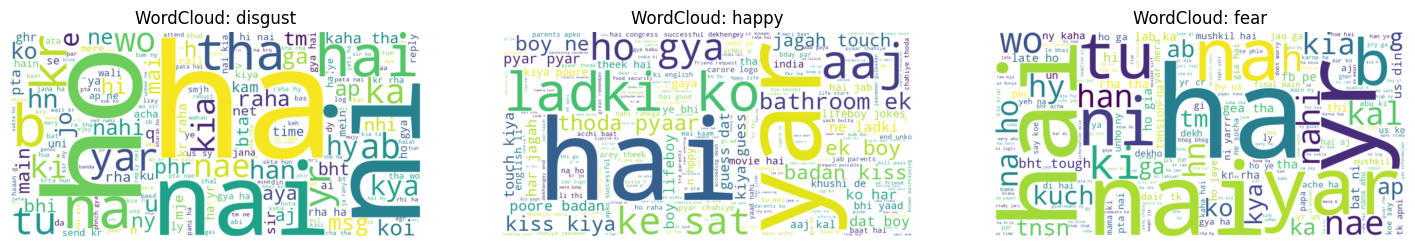

In [ ]:
top_emotions = df['emotion'].value_counts().index[:3]
plt.figure(figsize=(18,5))
for i, emotion in enumerate(top_emotions):
    text = ' '.join(df[df['emotion'] == emotion]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud: {emotion}')
plt.show()

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['emotion'].values


# Comparison Chart (Simulated Metrics)

In [ ]:
model_data = {
    'Model': [
        'SVM (TF-IDF)',
        'BERT + SVM',
        'Bi-LSTM + DLF + HEF',
        'Hybrid CNN-LSTM',
        'BERT-CNN',
        'XLNet-BiGRU-Att'
    ],
    'Accuracy (%)': [ 98.4,91.0, 80.5, 97.0,94.7, 91.7],
    'F1-Score (%)': [99.0,89.5,80.5,96.5,94.0,90.9]
}


In [ ]:
comparison_df = pd.DataFrame(model_data)

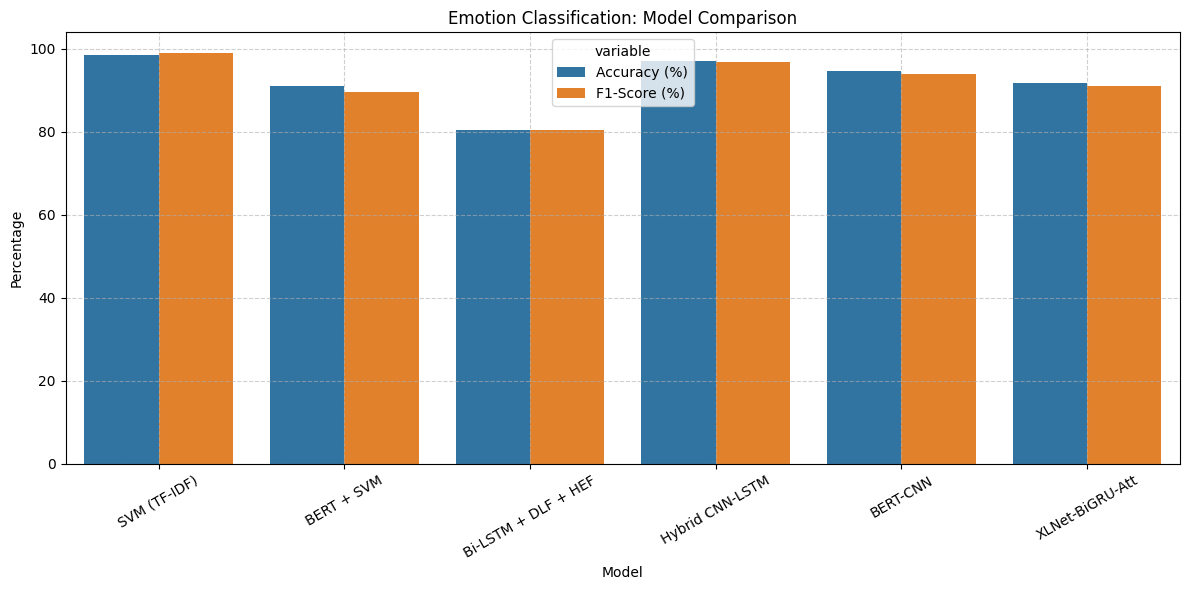

Comparison Table:
                 Model  Accuracy (%)  F1-Score (%)
0         SVM (TF-IDF)          98.4          99.0
1           BERT + SVM          91.0          89.5
2  Bi-LSTM + DLF + HEF          80.5          80.5
3      Hybrid CNN-LSTM          97.0          96.8
4             BERT-CNN          94.7          94.0
5      XLNet-BiGRU-Att          91.7          90.9


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Emotion Classification: Model Comparison')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Comparison Table:")
print(comparison_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#Train SVM with linear kernel on TF-IDF features

In [ ]:
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_tfidf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9840
              precision    recall  f1-score   support

       angry       0.98      0.99      0.98       400
     disgust       0.97      0.98      0.98       400
        fear       0.98      0.97      0.98       400
       happy       1.00      1.00      1.00       400
         sad       0.99      0.98      0.98       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
def predict_emotion(text, model, vectorizer):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vector)[0]
    return prediction

# Example
sample_text = "I'm so scared of what's going to happen."
print("Predicted Emotion:", predict_emotion(sample_text, svm_model, tfidf))

Predicted Emotion: fear
